# Import modules

In [21]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [86]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
#delete a column 

df = df.drop(columns = ["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#info about the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display number og samples in each class

df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocess the dataset

In [7]:
# check for nulll values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

In [8]:
# Histograms

<Axes: >

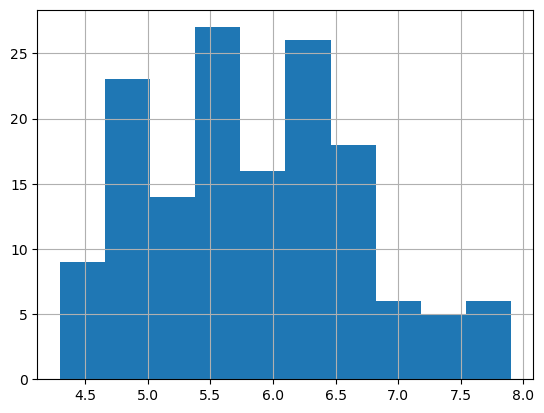

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

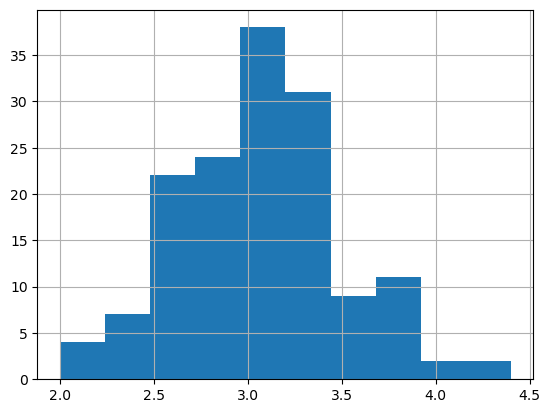

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

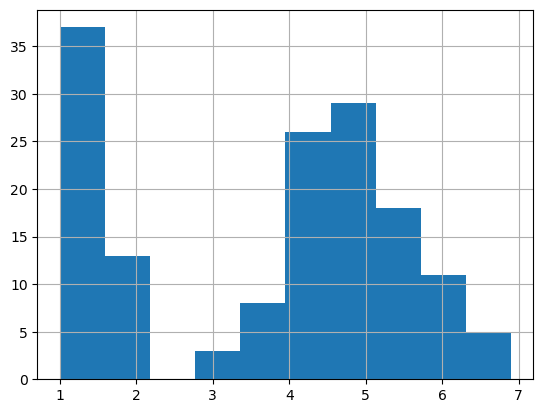

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

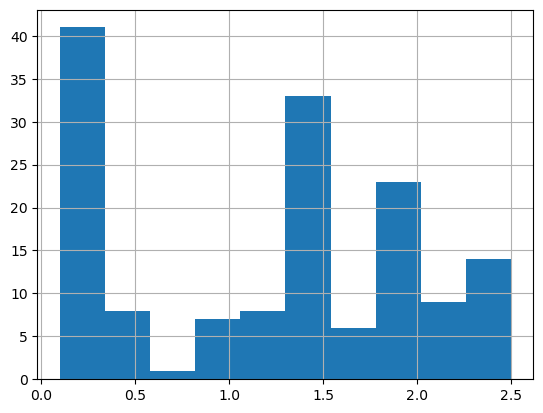

In [12]:
df['PetalWidthCm'].hist()

In [13]:
# Scatter Plots

In [14]:
colors = ['lightblue', 'lightpink', 'lavender']
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

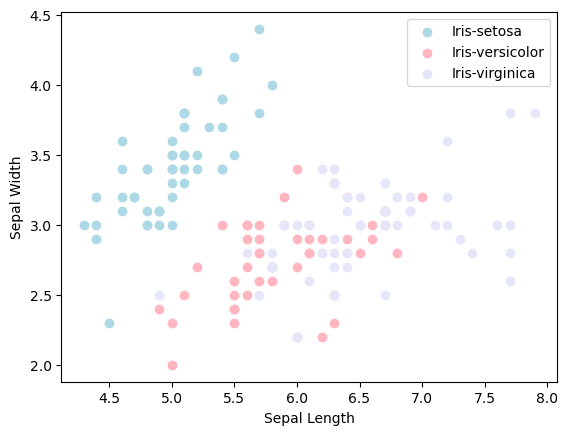

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i] , label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

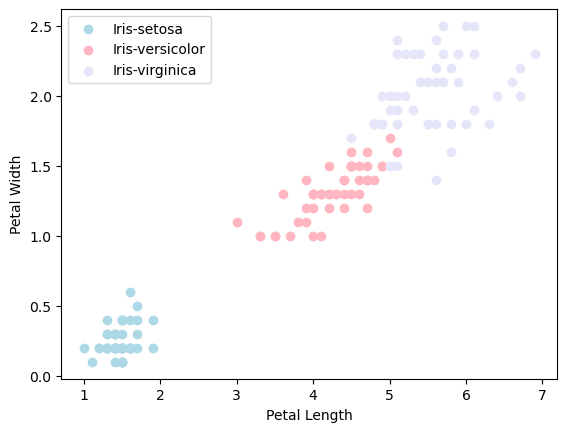

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i] , label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

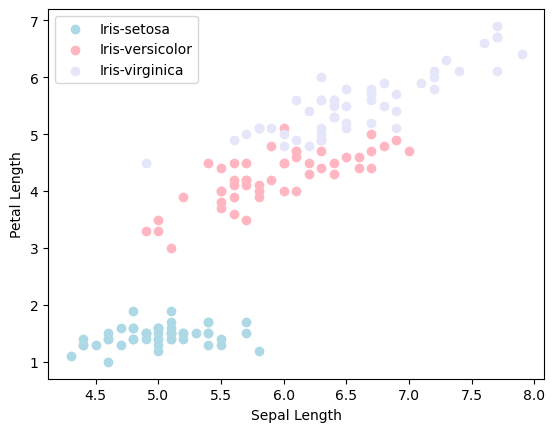

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i] , label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

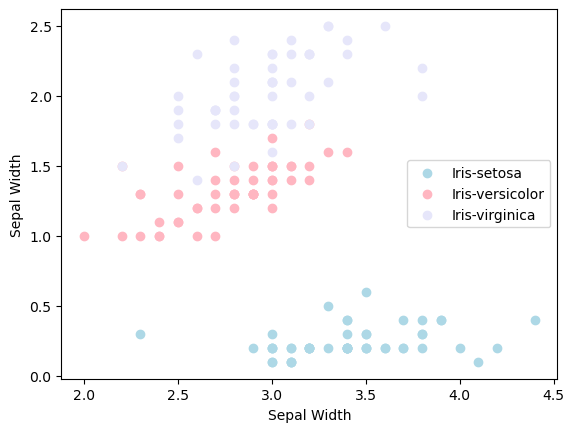

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i] , label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Width")
plt.legend()

# Correlation Matrix

In [23]:
new_df = df.copy()

In [25]:
new_df = new_df.drop(columns = ['Species'])

In [26]:
new_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

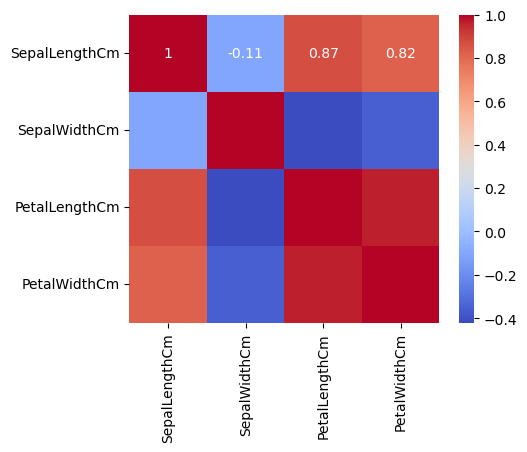

In [29]:
corr = new_df.corr()
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(corr, annot= True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In [33]:
# To convert the labels into numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [88]:
# Model selection

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Species'])
Y = df['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [90]:
# Model Training

logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [91]:
# Print metric to get performance

print("Accuracy: ", logistic_model.score(X_test, Y_test)*100)

Accuracy:  100.0


## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [70]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [71]:
print("Accuracy: ", knn_model.score(X_test, Y_test)*100)

Accuracy:  100.0


## Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [73]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
print("Accuracy: ", dt_model.score(X_test, Y_test)*100)

Accuracy:  100.0


# Saving the Model

In [92]:
import pickle

In [93]:
filename = 'model.pkl'
pickle.dump(logistic_model, open(filename, 'wb'))

In [94]:
X_test.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [95]:
Y_test.head(2)

73    Iris-versicolor
18        Iris-setosa
Name: Species, dtype: object

# Loading the model

In [96]:
load_model = pickle.load(open(filename, 'rb'))

In [97]:
load_model.predict([[6.1, 2.8, 4.7, 1.2]])

array(['Iris-versicolor'], dtype=object)